In [1]:
from music21 import interval
from extract_data import *

In [2]:
def data_to_json_transpose(folder):
    '''Retourne la liste des dictionnaire'''
    D=[]
    for i,file in enumerate(os.listdir(folder)) :
        if file[-3:] =="xml":
            s=music21.converter.parse(folder+"/"+file)
            for i in range(-6,7):
                if i!=0:
                    interval = music21.interval.Interval(i)  
                    s = s.transpose(interval)
                    dictionnary= score_to_dict(s,transpose=" "+str(i))
                    D.append(dictionnary)
                else:
                    dictionnary= score_to_dict(s)
                    D.append(dictionnary)
    return D


def score_to_dict(score,transpose=""):
    D=dict()
    nb_measures= get_number_of_measures(score)
    chord_symbols = extract_chord_symbols(score)
    note_symbols=extract_notes(score)
    exp_symbols= extract_expression(score)
    rehearsal_mark_indices = get_measure_indices_for_rehearsal_marks(score)
    repeat_mark=get_repeat(score)
    marks=get_marks_repeat(score)
    keys=get_keys(score)
    t=get_time_signature(score)
    starts= [ i for m,i in rehearsal_mark_indices] +[nb_measures+1]
    segments_end = [ s[0][1] for s in repeat_mark.values()]
    D['title']=score.metadata.title+transpose
    D['time_signature']=t
    seg_i=0
    for mark,(_,i) in enumerate(rehearsal_mark_indices):
        D[MARKS[mark]]= dict()
        j= i #start
        m_i=1
        D[MARKS[mark]]["key"]= str(keys[mark]) if mark< len(keys) else str(keys[0])
        while j < starts[mark+1]:
            D[MARKS[mark]][m_i]=dict()
            D[MARKS[mark]][m_i]["Notes"] = note_symbols[i] if i in note_symbols else []
            D[MARKS[mark]][m_i]["Expressions"] = exp_symbols[i] if i in exp_symbols else []
            D[MARKS[mark]][m_i]["Accords"] = chord_symbols[i] if i in chord_symbols else []
            m_i+=1
            j+=1
            if seg_i < len(segments_end): # il y a toujours des segments
                if j-1== segments_end[seg_i] and segments_end[seg_i]<starts[mark+1]: #segment correspond a la partie
                    seg_i+=1
                    break
    return D


In [50]:
D=[]
S=[]
s=music21.converter.parse("Data/data_xml/A VIDA É UM BURACO.xml")
s.show("text")
for i in range(-1,2):
    transposed_score = s.transpose(i*12)
    S.append(transposed_score)

{0.0} <music21.text.TextBox 'A Vida é u...'>
{0.0} <music21.text.TextBox 'PIXINGUINH...'>
{0.0} <music21.text.TextBox 'POLCA'>
{0.0} <music21.text.TextBox 'Aldo Guina...'>
{0.0} <music21.metadata.Metadata object at 0x16c62c12210>
{0.0} <music21.stream.Part P1>
    {0.0} <music21.instrument.Instrument 'P1: P1: '>
    {0.0} <music21.stream.Measure 0 offset=0.0>
        {0.0} <music21.layout.PageLayout>
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.layout.StaffLayout distance None, staffNumber 1, staffSize None, staffLines None>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.Key of C major>
        {0.0} <music21.meter.TimeSignature 2/4>
        {0.0} <music21.note.Note E>
        {0.25} <music21.note.Note D>
        {0.5} <music21.repeat.Segno 'Segno'>
        {0.5} <music21.note.Note C>
        {0.75} <music21.note.Note B>
    {0.0} <music21.spanner.RepeatBracket 1 <music21.stream.Measure 16 offset=31.0>>
    {0.0} <music21.spanner.RepeatBracket 

In [51]:
S[0].show("text")

{0.0} <music21.text.TextBox 'A Vida é u...'>
{0.0} <music21.text.TextBox 'PIXINGUINH...'>
{0.0} <music21.text.TextBox 'POLCA'>
{0.0} <music21.text.TextBox 'Aldo Guina...'>
{0.0} <music21.metadata.Metadata object at 0x16c60d8a510>
{0.0} <music21.stream.Part P1>
    {0.0} <music21.instrument.Instrument 'P1: P1: '>
    {0.0} <music21.stream.Measure 0 offset=0.0>
        {0.0} <music21.layout.PageLayout>
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.layout.StaffLayout distance None, staffNumber 1, staffSize None, staffLines None>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.Key of C major>
        {0.0} <music21.meter.TimeSignature 2/4>
        {0.0} <music21.note.Note E>
        {0.25} <music21.note.Note D>
        {0.5} <music21.repeat.Segno 'Segno'>
        {0.5} <music21.note.Note C>
        {0.75} <music21.note.Note B>
    {0.0} <music21.spanner.RepeatBracket 1 <music21.stream.Measure 16 offset=31.0>>
    {0.0} <music21.spanner.RepeatBracket 

In [52]:
S[2].show("text")

{0.0} <music21.text.TextBox 'A Vida é u...'>
{0.0} <music21.text.TextBox 'PIXINGUINH...'>
{0.0} <music21.text.TextBox 'POLCA'>
{0.0} <music21.text.TextBox 'Aldo Guina...'>
{0.0} <music21.metadata.Metadata object at 0x16c61919f50>
{0.0} <music21.stream.Part P1>
    {0.0} <music21.instrument.Instrument 'P1: P1: '>
    {0.0} <music21.stream.Measure 0 offset=0.0>
        {0.0} <music21.layout.PageLayout>
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.layout.StaffLayout distance None, staffNumber 1, staffSize None, staffLines None>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.Key of C major>
        {0.0} <music21.meter.TimeSignature 2/4>
        {0.0} <music21.note.Note E>
        {0.25} <music21.note.Note D>
        {0.5} <music21.repeat.Segno 'Segno'>
        {0.5} <music21.note.Note C>
        {0.75} <music21.note.Note B>
    {0.0} <music21.spanner.RepeatBracket 1 <music21.stream.Measure 16 offset=31.0>>
    {0.0} <music21.spanner.RepeatBracket 

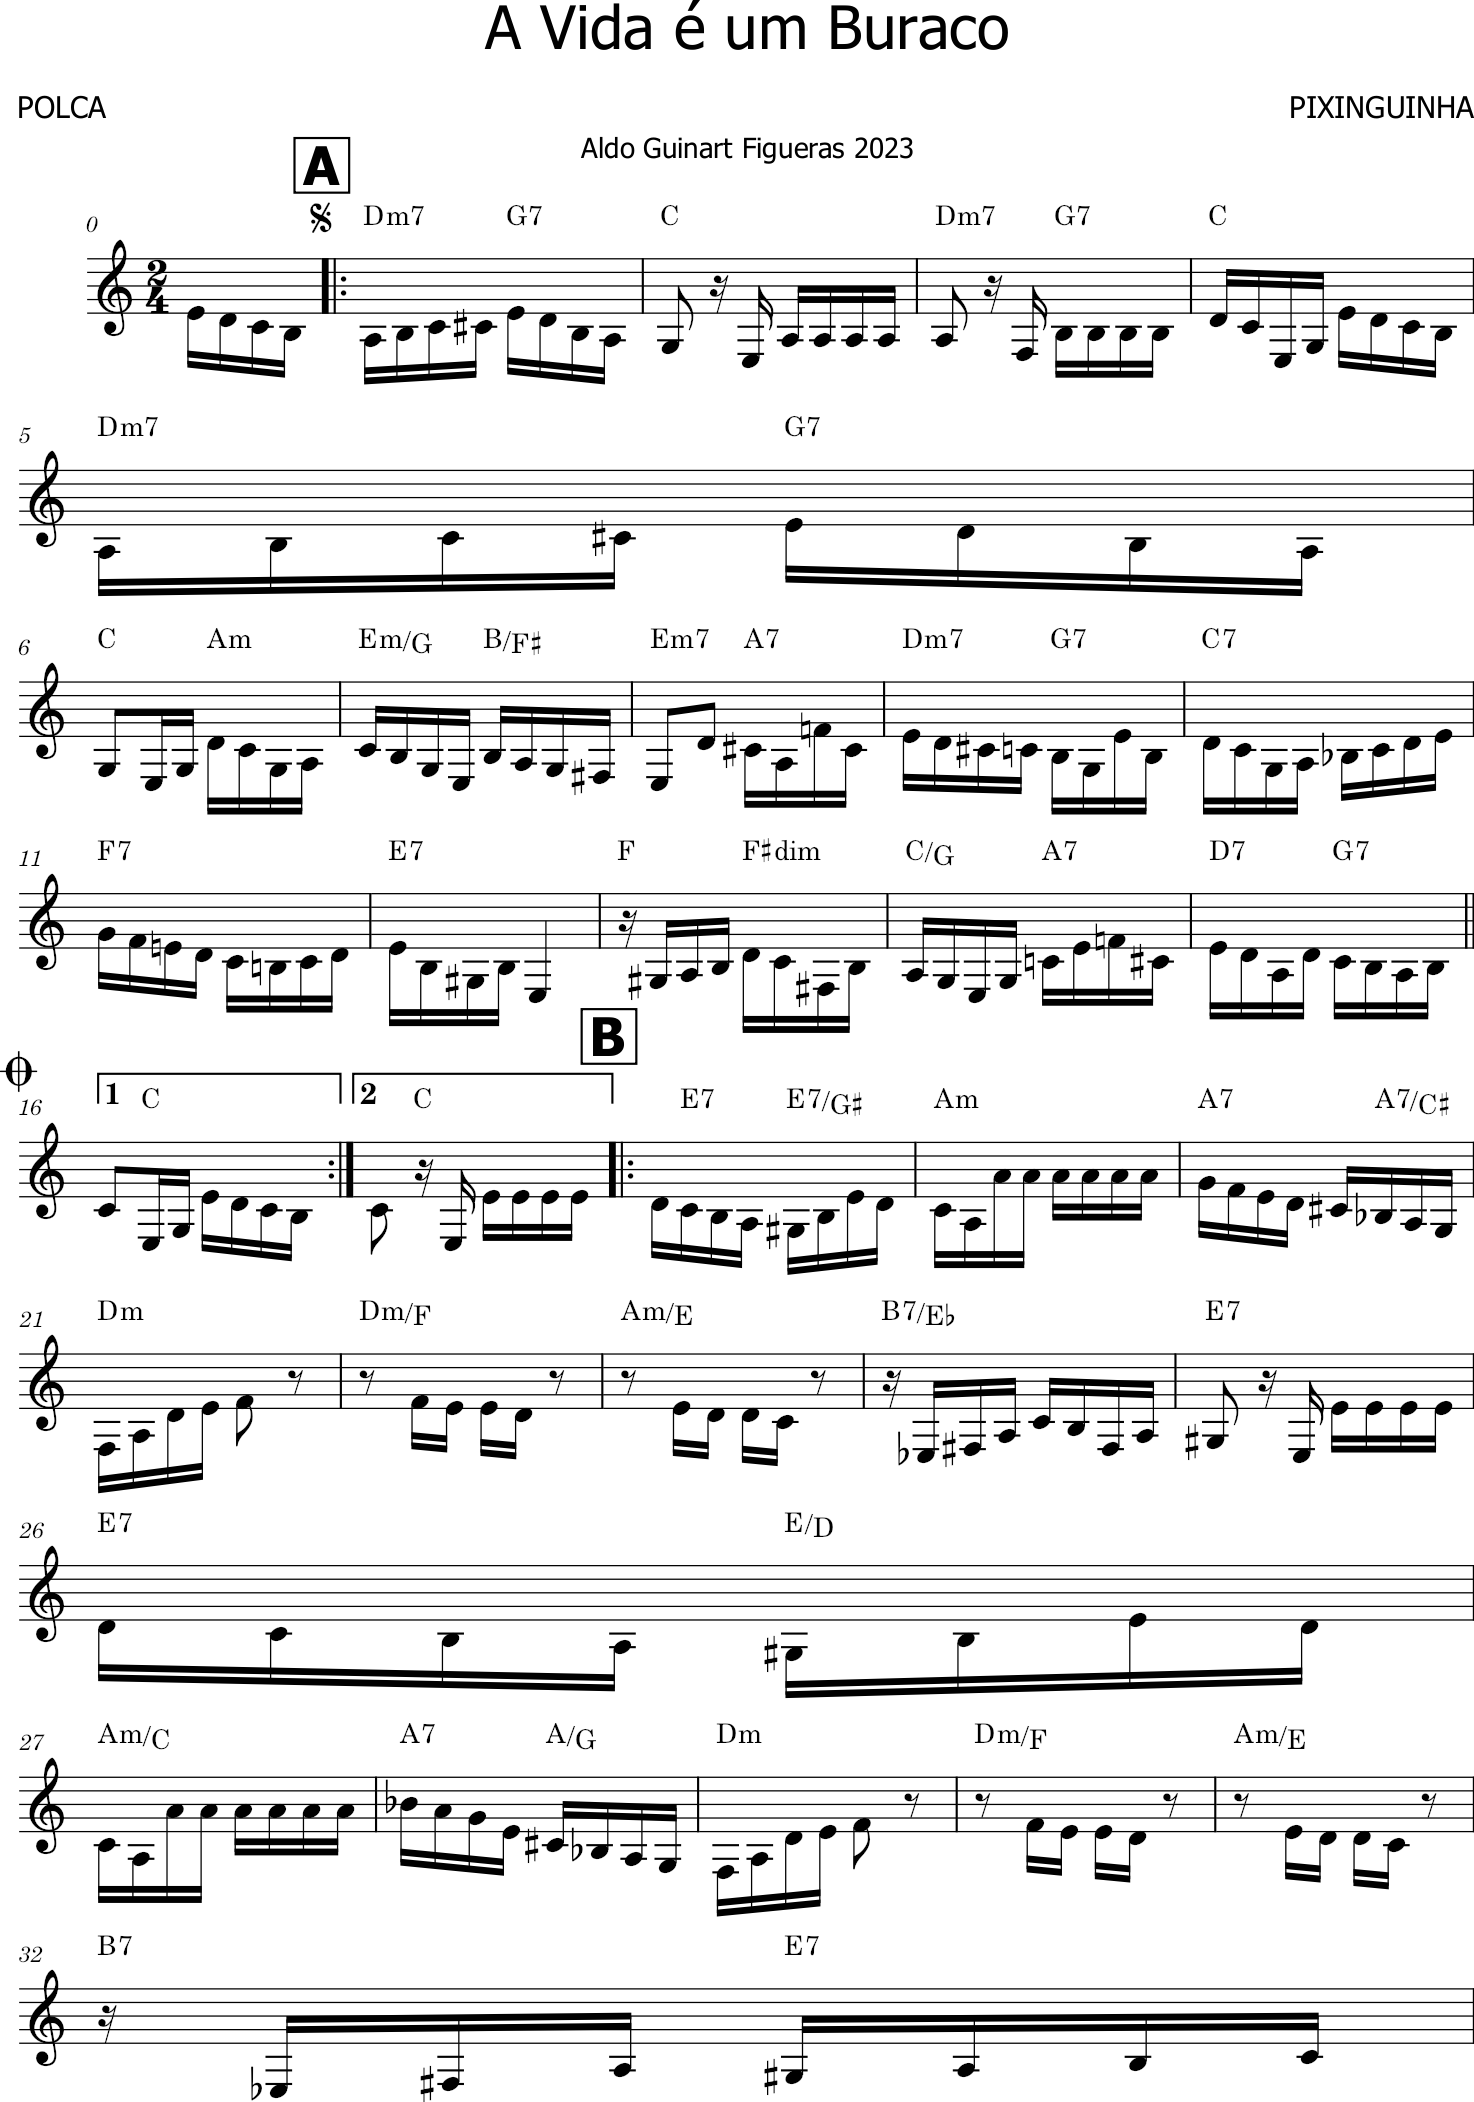

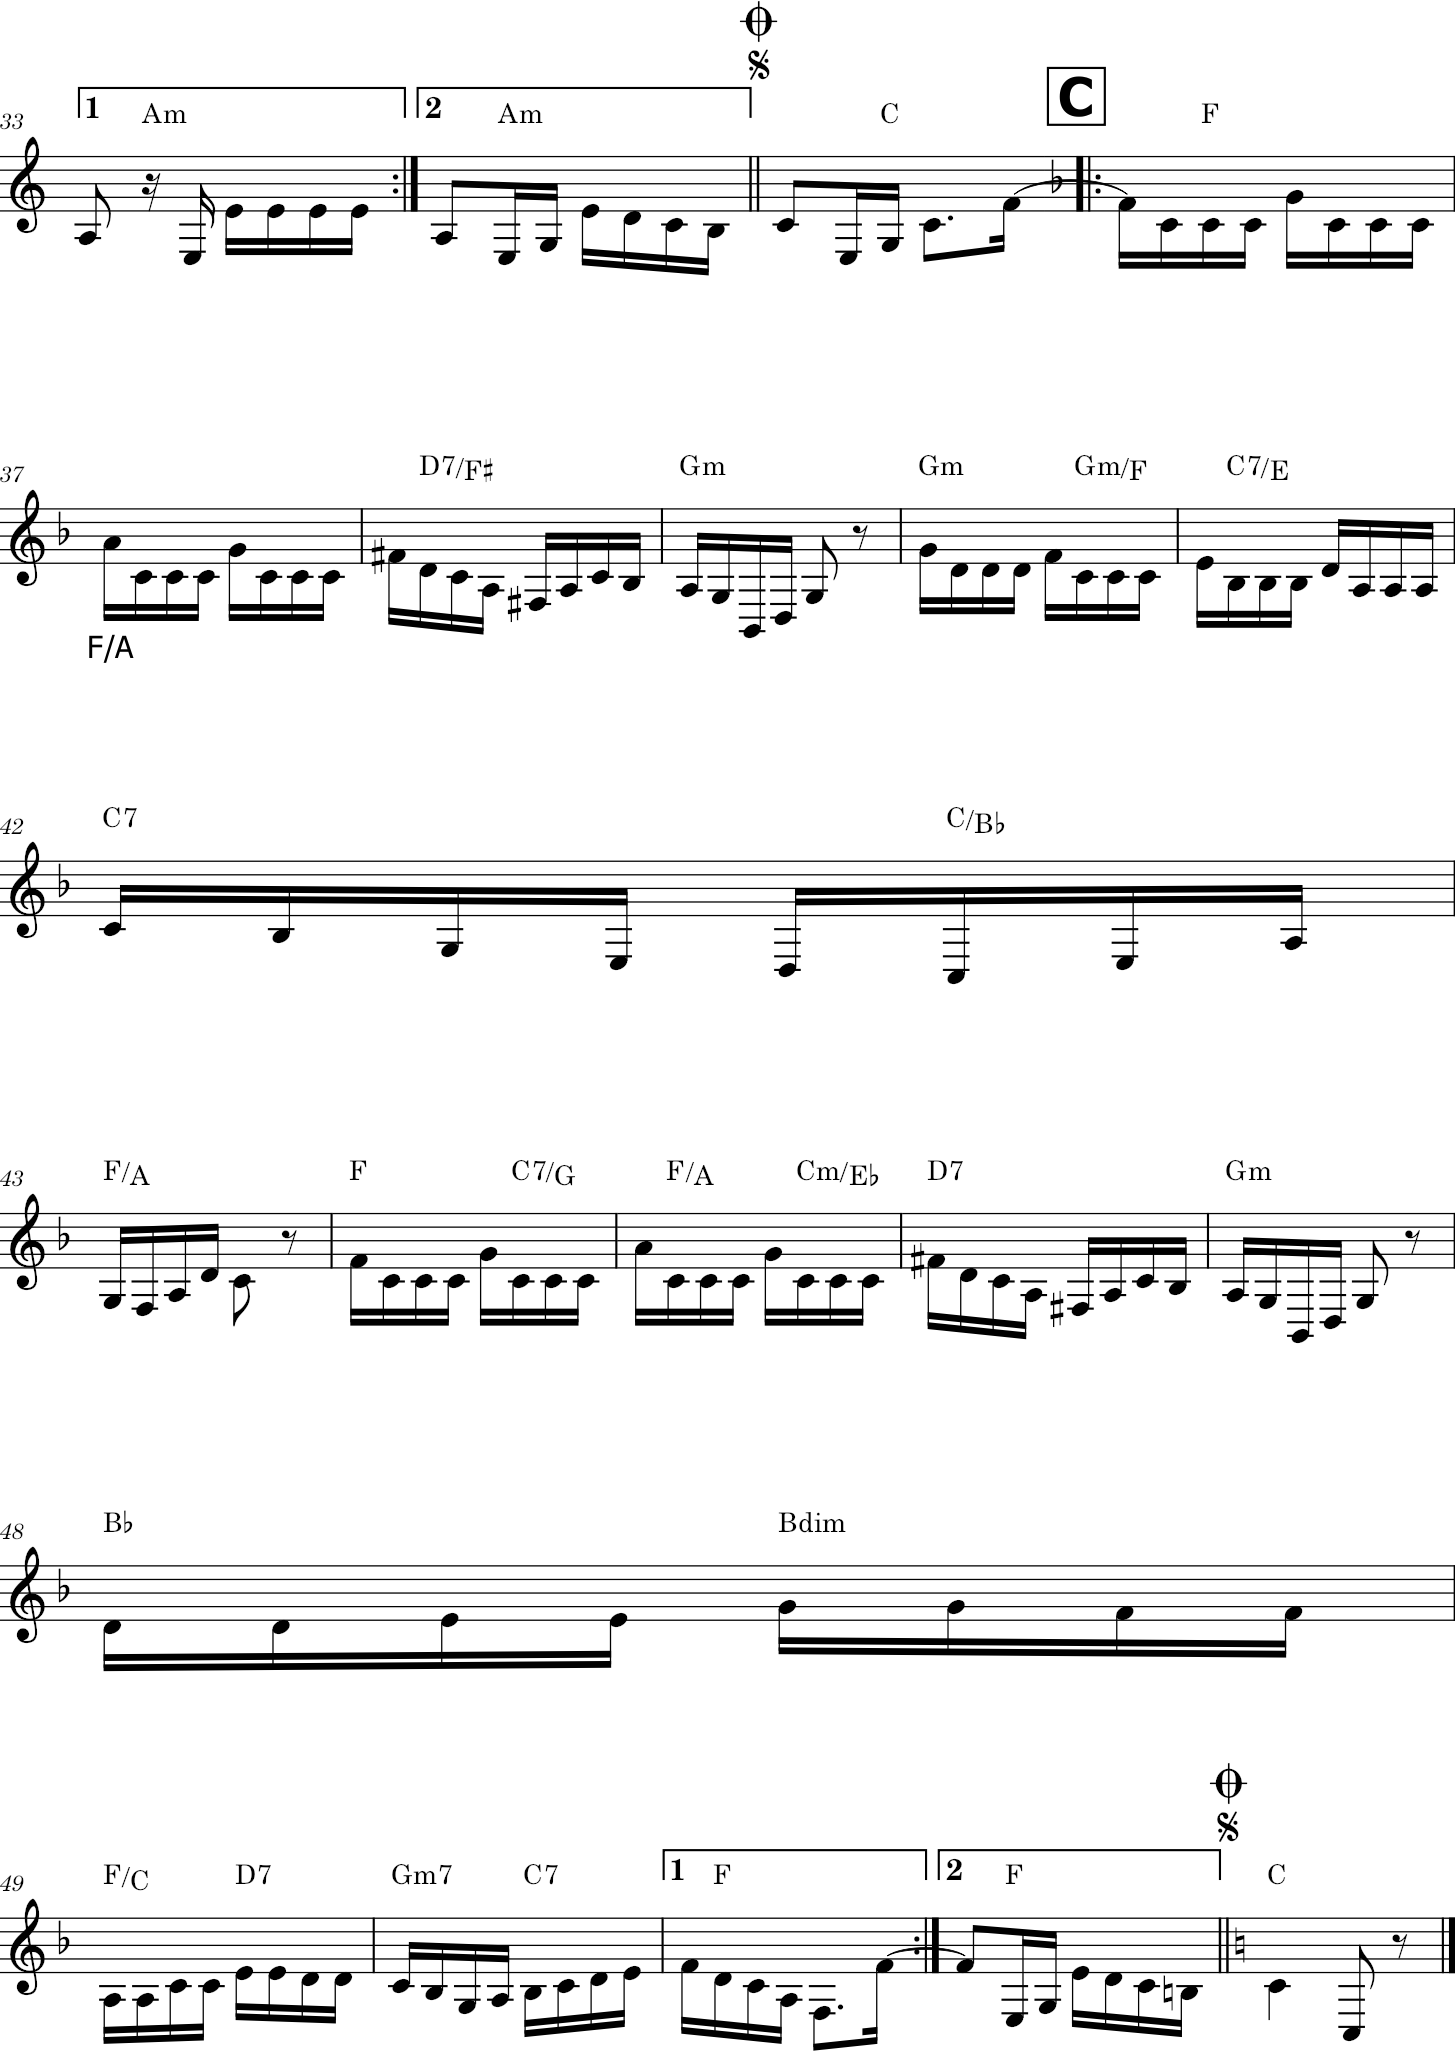

In [53]:
S[0].show()

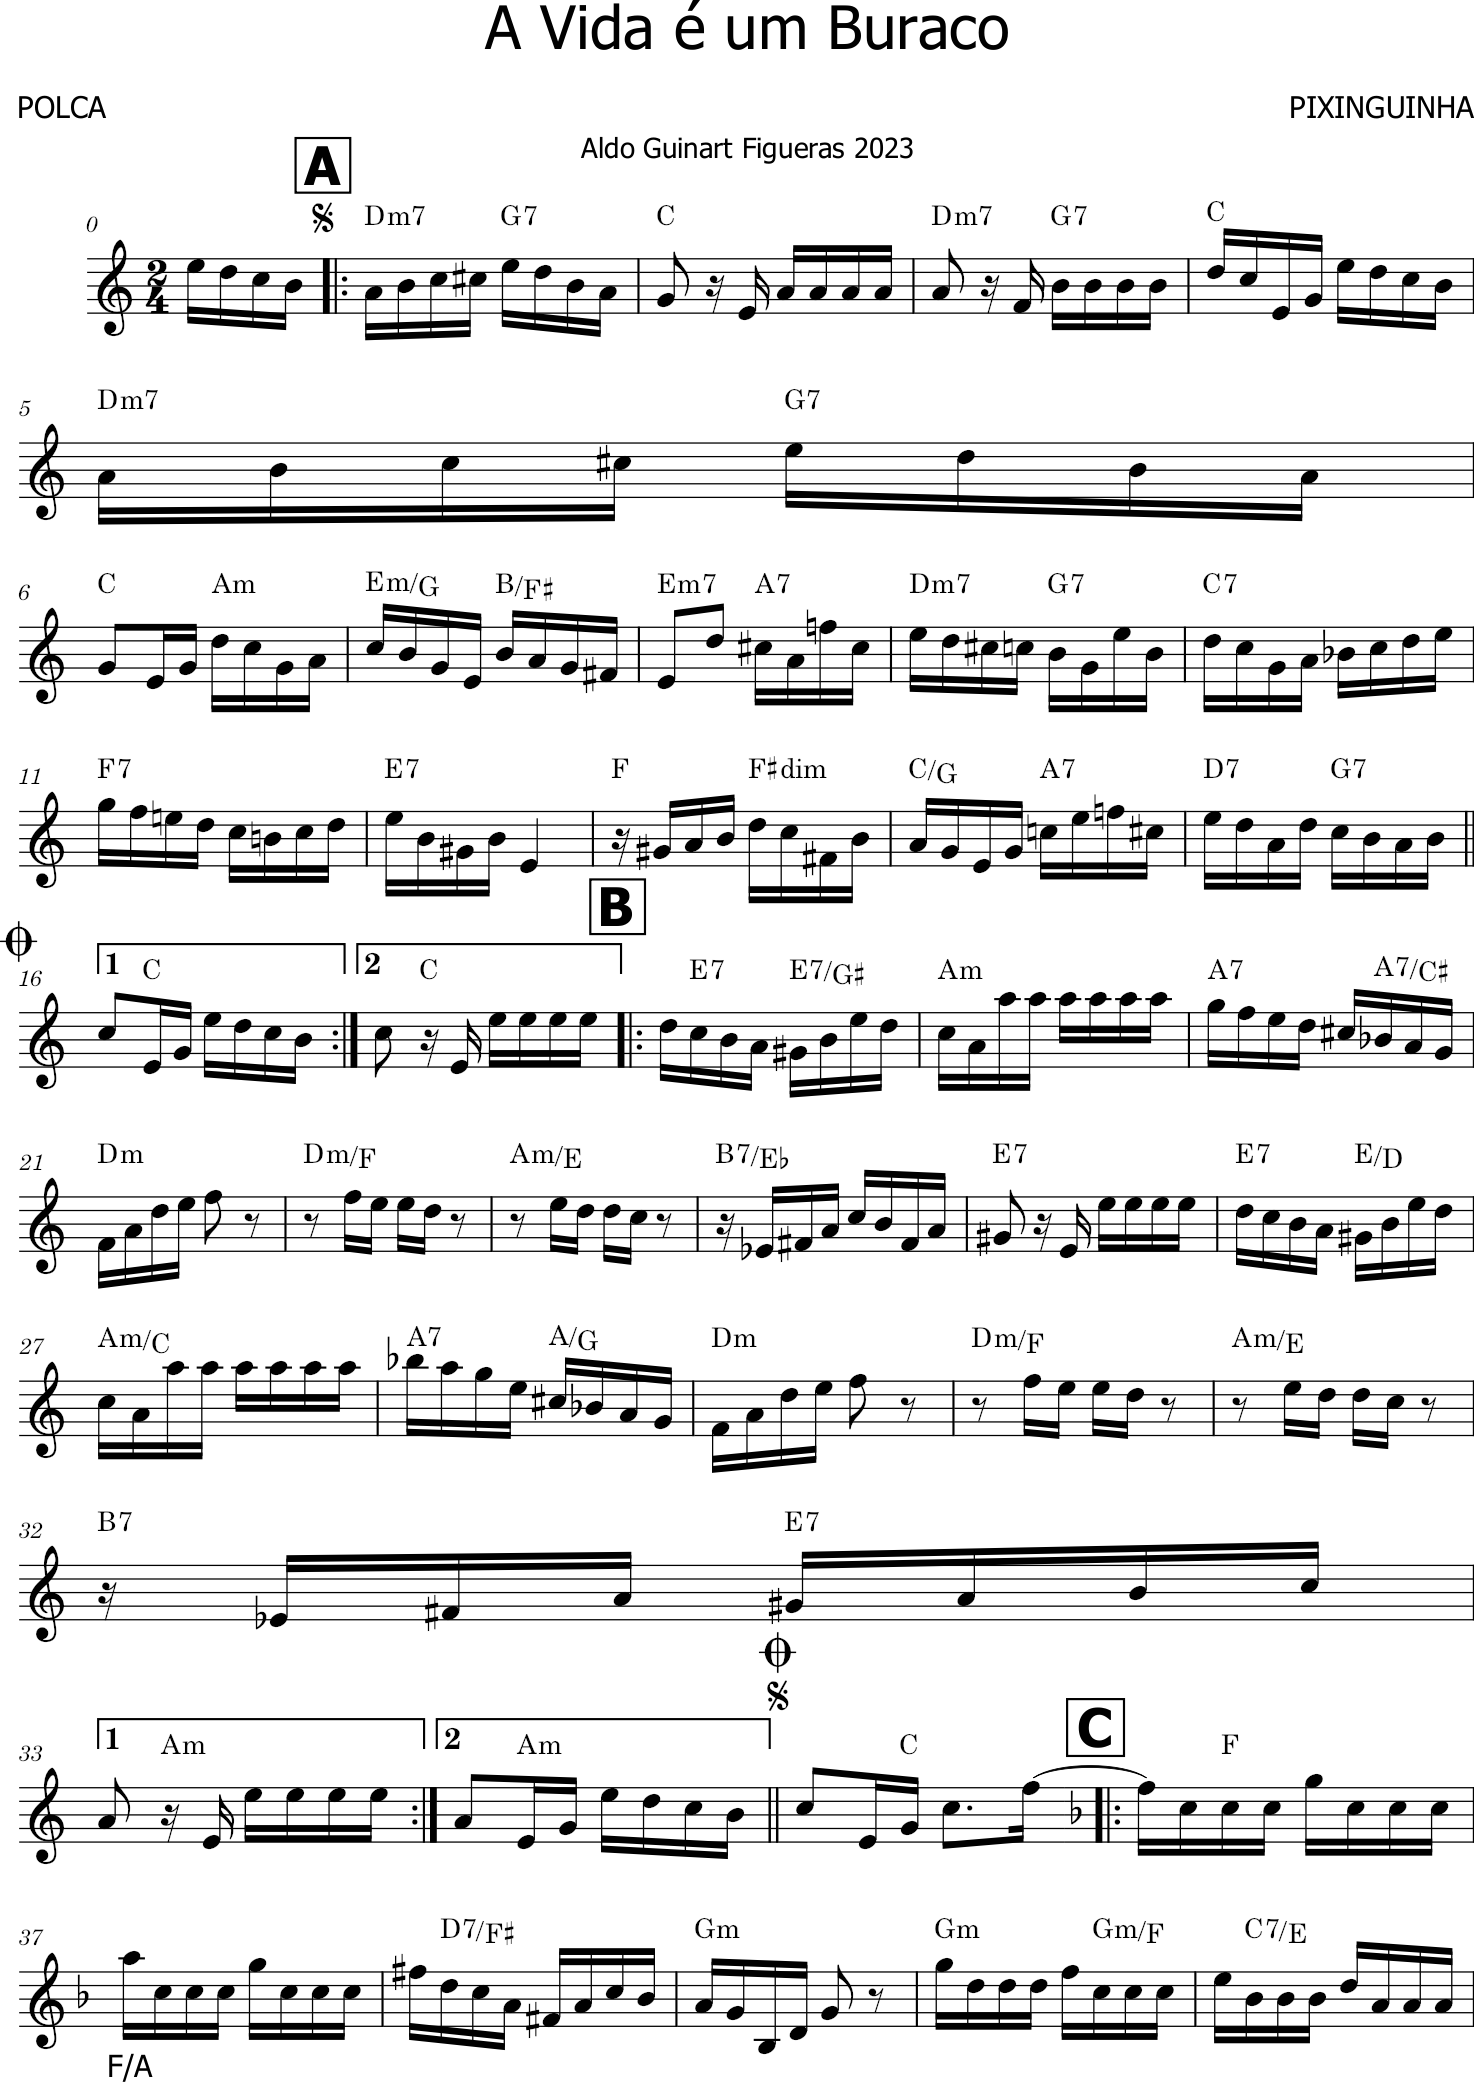

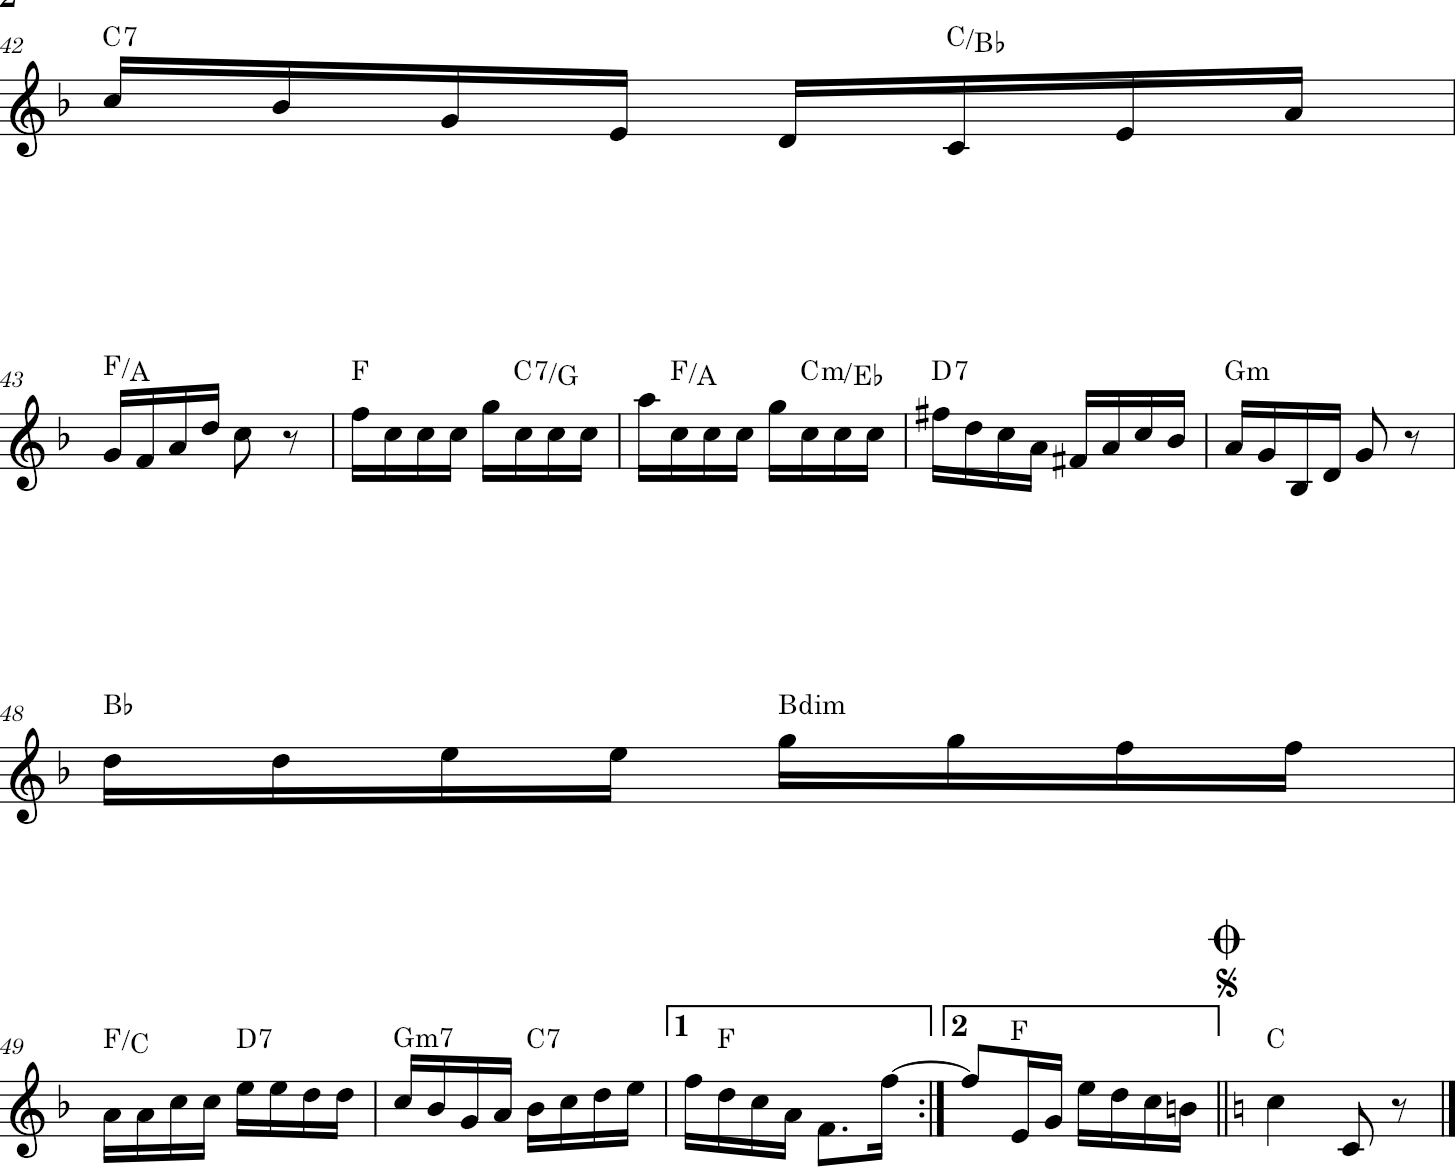

In [54]:
S[1].show()

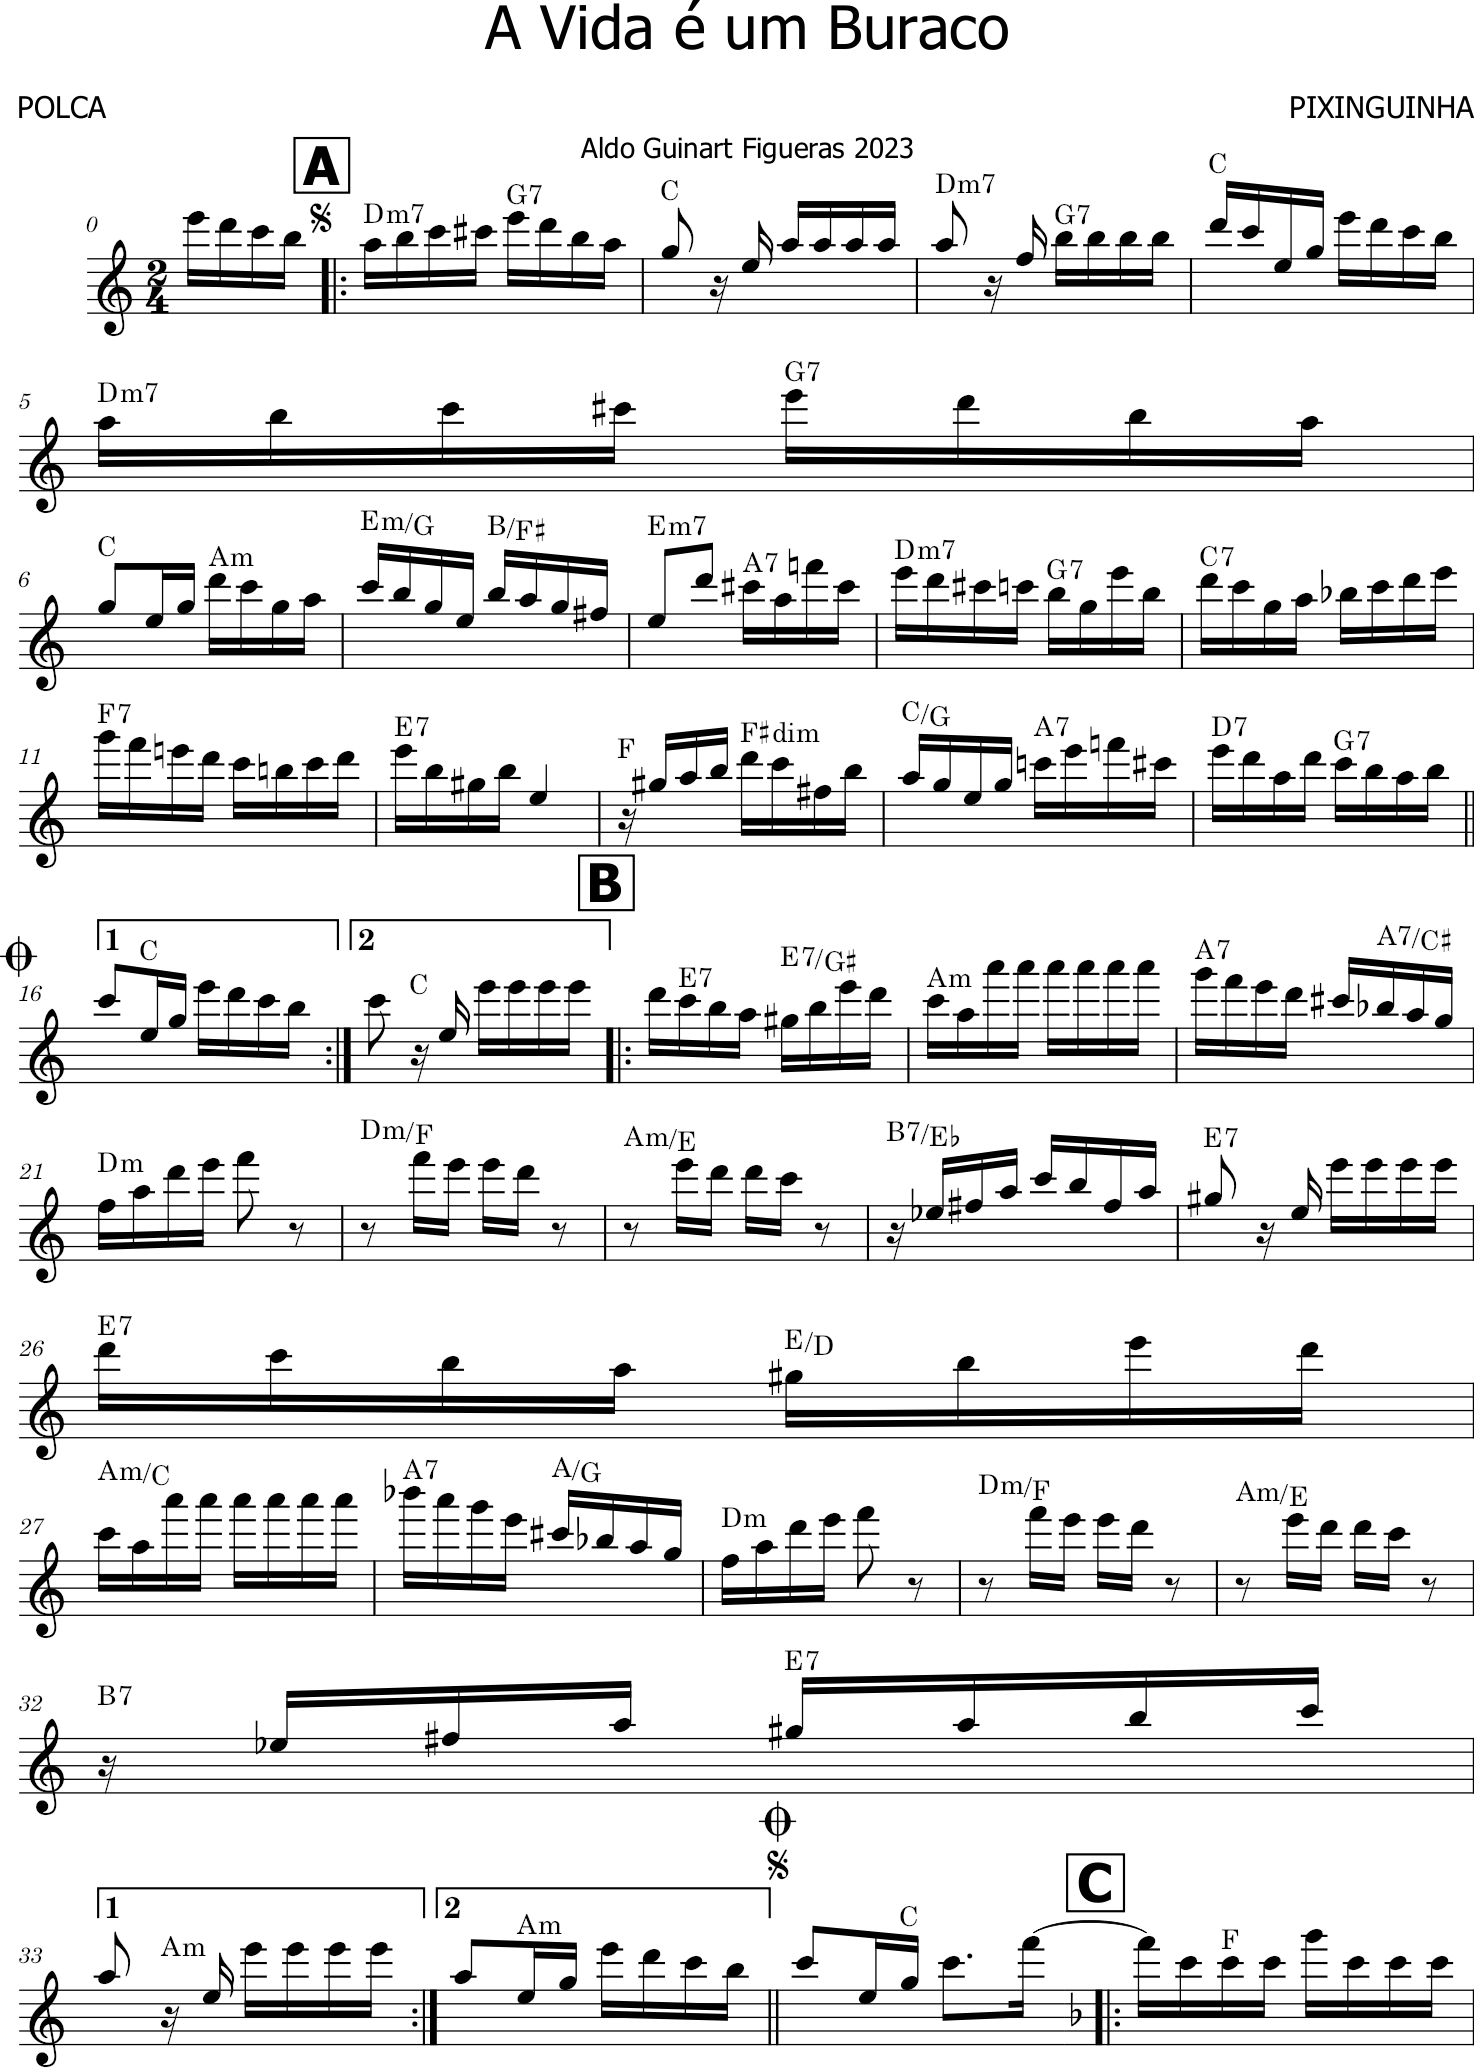

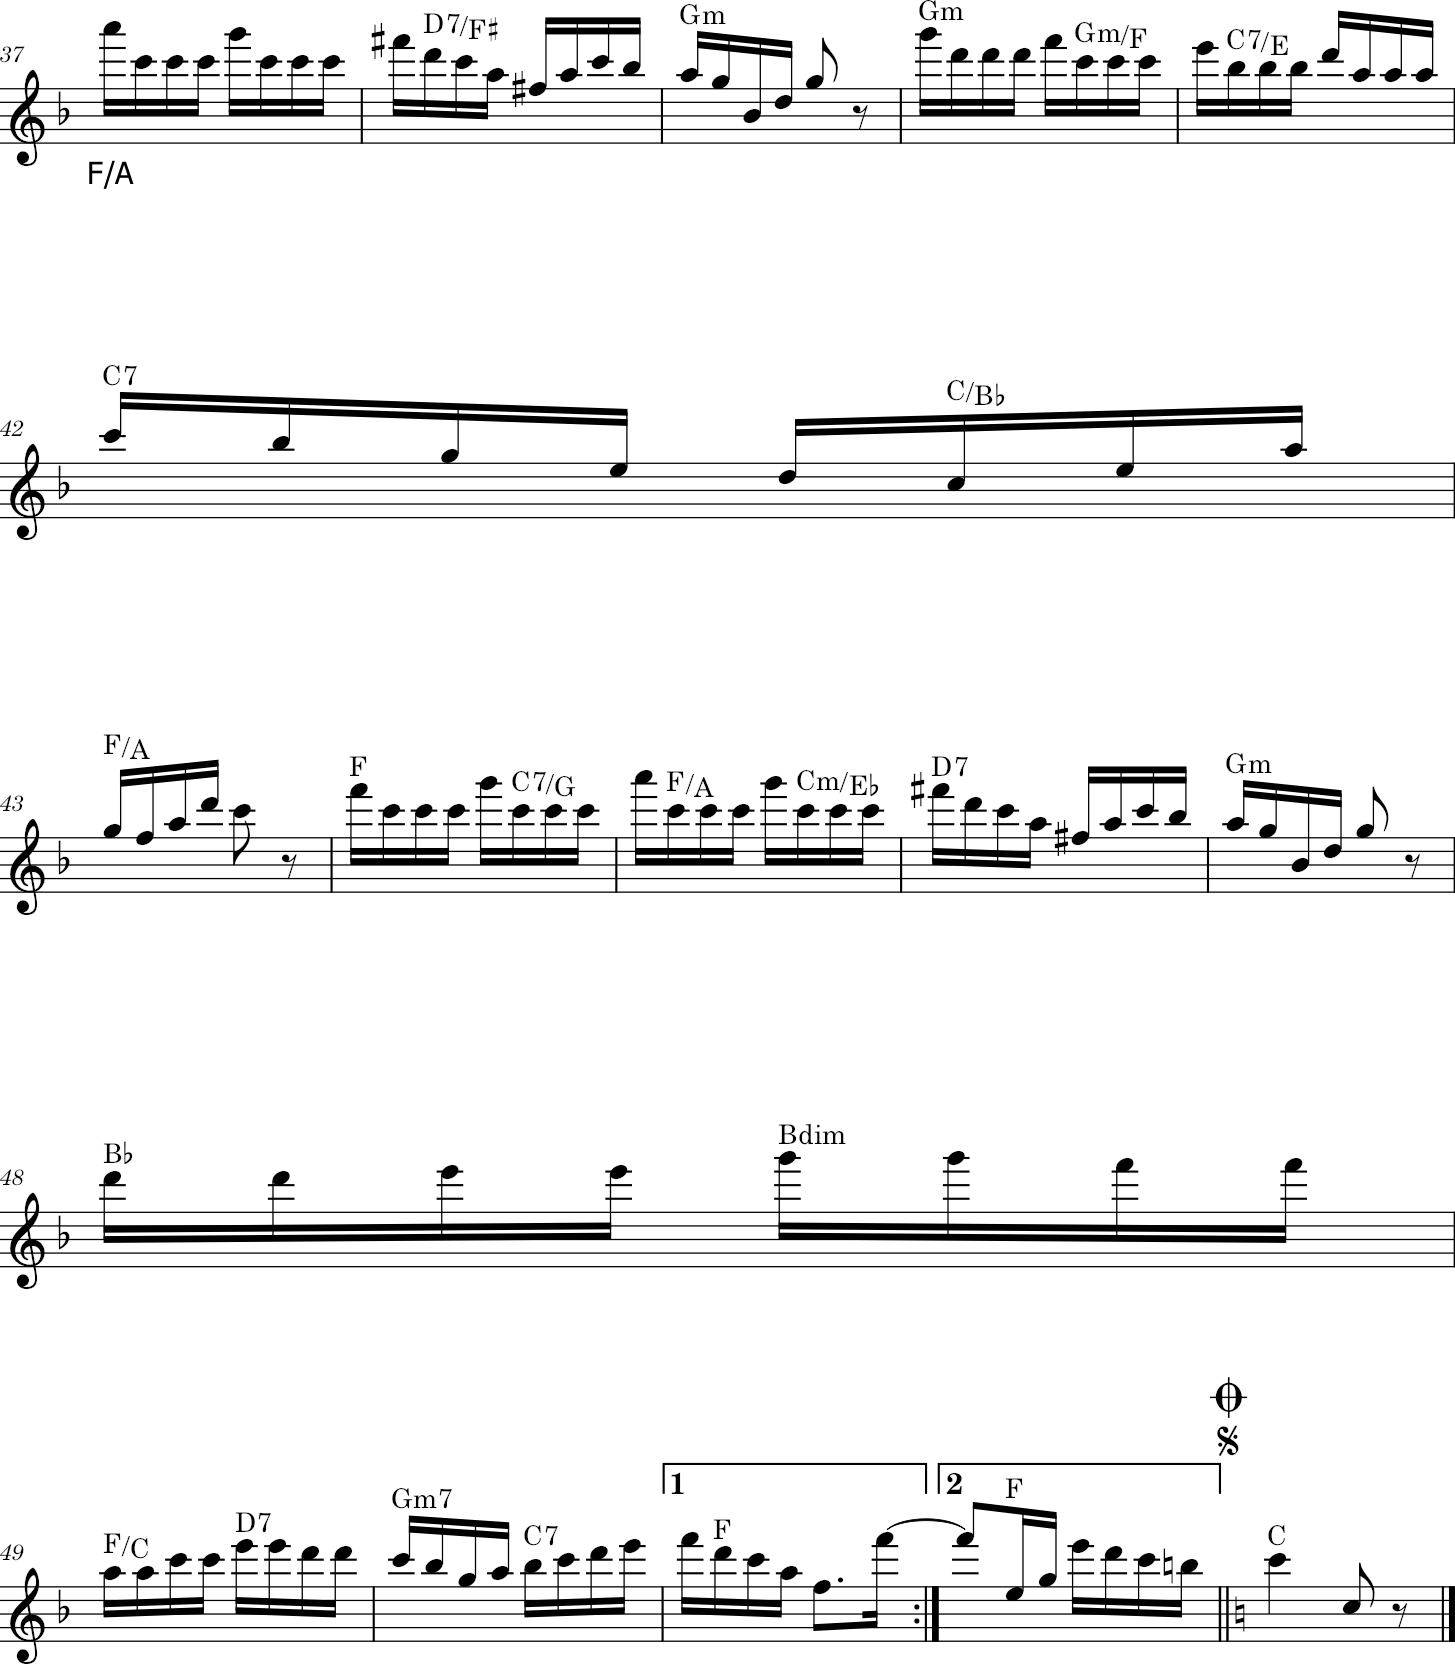

In [55]:
S[2].show()